In [1]:
################################################
# Numerical Methods for Stochastic             #
# Differential Equations                       #
################################################
#-----------------------------------------------
#-----------------------------------------------
################################################
# Compute the prices of a call option and      #
# the 95% confidence intervals with the        #
# Euler Monte Carlo method.                    #
################################################
#-----------------------------------------------

#import libraries
import time
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from math import exp, sqrt
import scipy.stats as stats
import statistics

# to plot the results in the notebook:
%matplotlib inline

## Heston Stochastic Volatility Model

\begin{align*}
dX_t&=(r-\frac{V_t}{2})dt+\sqrt{V_t}dW_t, \quad X_0=x, \\
dV_t&=\kappa(\theta-V_t)dt+\eta \sqrt{V_t} d\overline{W}_t, \quad V_0=v,
\end{align*}

where: 

- $S=S_0e^X,$ 
- $\kappa,\theta,\eta,v \in \mathbb{R}_+,$
- $r,x\in \mathbb{R},$
- $\rho \in[-1,1],$
- $\overline{W}=\rho W +\sqrt{1-\rho^2}\tilde{W}$, $W$ and $\tilde{W}$ are indipendent Brownian motions.

In [2]:
#-----------------------------------------------
################################################
# Euler Monte Carlo method for a call option   #
# under the Heston stochastic volatility model.#
################################################
#-----------------------------------------------
def EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho):
    M = N**2                            #simulations
    price_trajectories = []             #MC array
    payoff_array       = []
    discount_factor    = exp(-r * T)

    # Tic
    t = time.time()

    # Calculating payoff vector.
    for i in range(0, M):

        S_old = S
        V_old = V
        
        for i in range(0, N):
            xi = np.random.normal(0,sqrt(delta_t)) 
            xj = np.random.normal(0,sqrt(delta_t))
            
            xk = rho*xi + sqrt(1-rho**2)*xj

            S_new = S_old + r*S_old*delta_t -0.5*V_old*S_old*delta_t \
                  + S_old*sqrt(max(V_old,0))*xi
                
            V_new = V_old + k*(theta-V_old)*delta_t + eta*sqrt(max(V_old,0))*xk

            S_old = S_new
            V_old = V_new
            

        price_trajectories.append(S_new)
        payoff=max(S_new-K,0)
        payoff_array.append(payoff)

    # Computing price
    payoff_array = np.array(payoff_array, dtype=float) 
    price = np.sum(discount_factor*payoff_array)/M
    print(str("Call Option Price: %.4f") % price)

    # Statistics
    variance = np.var(discount_factor*payoff_array)
    sd = np.std(discount_factor*payoff_array)
    # Variance Estimator
    varest=sum((price-discount_factor*payoff_array)**2)/(M-1)
    # Root Mean Square Error
    RMSE=sqrt(varest)/sqrt(M)
    # 95% C.I. uses 1.96 z-value
    CI = [price - (1.96*sd/sqrt(float(M))),
          price + (1.96*sd/sqrt(float(M)))]

    # Toc
    elapsed = time.time() - t

    #Print
    print("Variance: %.4f" % variance)
    print("Standard Deviation: %.4f" % sd)
    print("95% Confidence Interval:", CI) 
    print("Variance Estimator: %.4f" % varest)
    print("Root Mean Square Error: %.4f" % RMSE)
    print("Run time: %.4f" % elapsed)

    # Plot
    sims=range(1,M+1)
    plt.plot(sims,price_trajectories,color = 'red')
    plt.suptitle('Maturity Prices', fontsize=35)
    plt.xlabel('Simulation #', fontsize = 30)
    plt.ylabel('Price', fontsize= 30)
    plt.grid(True)
    
    return price, price_trajectories

In [3]:
################################################
# Input data.                                  #
################################################
S       = 100                             #spot price
V       = 0.09                            #initial volatility
r       = 0                               #interest rate
T       = 1                               #maturity
k       = 1
theta   = 0.09
eta     = 1
rho     = -0.3                            #correlation
N       = 300                             #number of discrete time points
delta_t = T / N                           #length of interval partition 

Call Option Price: 20.6980
Variance: 433.2441
Standard Deviation: 20.8145
95% Confidence Interval: [20.562037154173783, 20.83401350984546]
Variance Estimator: 433.2489
Root Mean Square Error: 0.0694
Run time: 261.0904


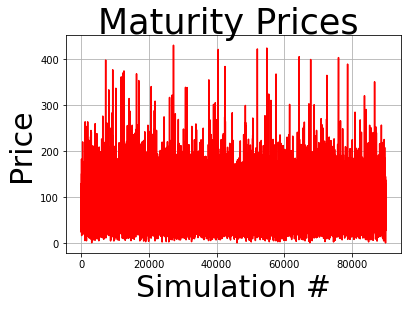

In [4]:
K       = 80                              #strike price(i)

C_80, price_trajectories = EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho)

Call Option Price: 7.8612
Variance: 234.2392
Standard Deviation: 15.3049
95% Confidence Interval: [7.7611716525134185, 7.961155368993403]
Variance Estimator: 234.2418
Root Mean Square Error: 0.0510
Run time: 273.0452


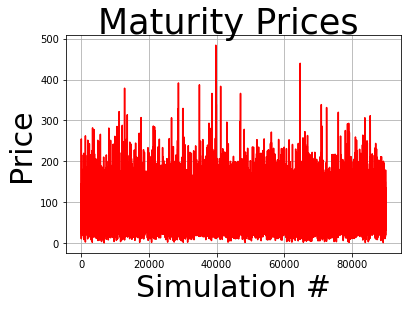

In [5]:
K       = 100                             #strike price(ii)

C_100, _ = EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho)

Call Option Price: 2.4556
Variance: 117.9862
Standard Deviation: 10.8621
95% Confidence Interval: [2.3846286024022154, 2.5265606126607167]
Variance Estimator: 117.9875
Root Mean Square Error: 0.0362
Run time: 272.1502


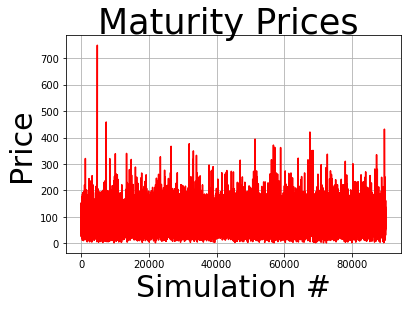

In [6]:
K       = 120                             #strike price(iii)

C_120, _ = EMC_Call_Option(S,V,r,T,delta_t,N,K,k,theta,eta,rho)

In [7]:
#-----------------------------------------------
################################################
# Study empirically the convergence of the     #
# Euler scheme.                                #
################################################
#-----------------------------------------------

def EMC_Call_Option_price_CI(S,V,r,T,N,K,k,theta,eta,rho):
    M       = N**2                        #simulations
    delta_t = T/N                         #length of partition
    payoff_array       = []
    discount_factor    = exp(-r * T)

    # Calculating payoff vector.
    for i in range(0, M):

        S_old = S
        V_old = V
        
        for i in range(0, N):
            xi = np.random.normal(0,sqrt(delta_t)) 
            xj = np.random.normal(0,sqrt(delta_t))
            
            xk = rho*xi + sqrt(1-rho**2)*xj

            S_new = S_old + r*S_old*delta_t -0.5*V_old*S_old*delta_t \
                  + S_old*sqrt(max(V_old,0))*xi
                
            V_new = V_old + k*(theta-V_old)*delta_t + eta*sqrt(max(V_old,0))*xk

            S_old = S_new
            V_old = V_new
            

        payoff=max(S_new-K,0)
        payoff_array.append(payoff)

    # Computing price
    payoff_array = np.array(payoff_array, dtype=float) 
    price = np.sum(discount_factor*payoff_array)/M
    
    # Statistics
    sd = np.std(discount_factor*payoff_array)
    # 95% C.I. uses 1.96 z-value
    CI = [price - (1.96*sd/sqrt(float(M))),
          price + (1.96*sd/sqrt(float(M)))]
    
    CI_slack = [-(1.96*sd/sqrt(float(M))),
                 (1.96*sd/sqrt(float(M)))]
    
    return price, CI_slack

# Defining an error function with inputs: (i) strike price K, (ii) final value of Euler 
# discretization parameter and (iii) step size.
def error(K, Nf, step):
    CI_array    = []                                      #array containing the confidence intervals
    
    error_array = []                                      #array containing the difference between 
                                                          #EMC estimation using Ni and Nf 
                                                          #discretization parameters
            
    N_array = np.array(range(0,Nf+1,step), dtype=int)     #array containing int(Nf/step) Euler
                                                          #discretization parameters (dentoted as Ni)

    np.put(N_array,0,1)                                   #replacing first (zero) value with 1

    # Computing this value out of the for loop to save time. 
    # The price value for the final value of the discretization parameter.
    price_f, _ = EMC_Call_Option_price_CI(S,V,r,T,Nf,K,k,theta,eta,rho)
    
    for Ni in N_array:
        # The following values are updated in every iteration.
        price_i, CI_i = EMC_Call_Option_price_CI(S,V,r,T,Ni,K,k,theta,eta,rho)
        
        error_i = abs(price_f - price_i)
        error_array.append(error_i)
        
        # max(... , ...) function comes in handy because 
        # the logarithm of zero and negative values doesn't exist. 
        CI_i = [max(x + error_i, 0.01) for x in CI_i]
        CI_array.append(CI_i)
    return N_array, error_array, CI_array

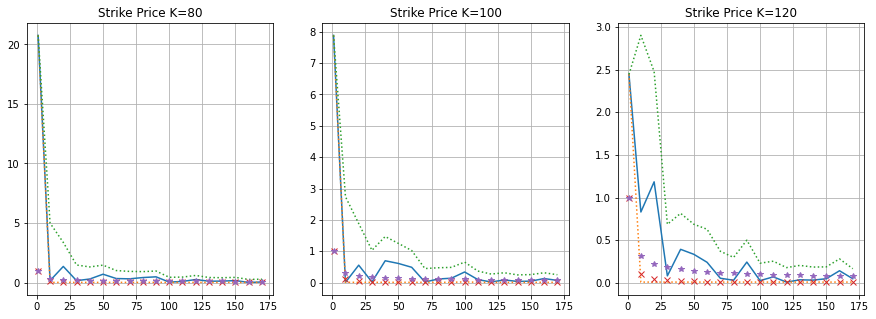

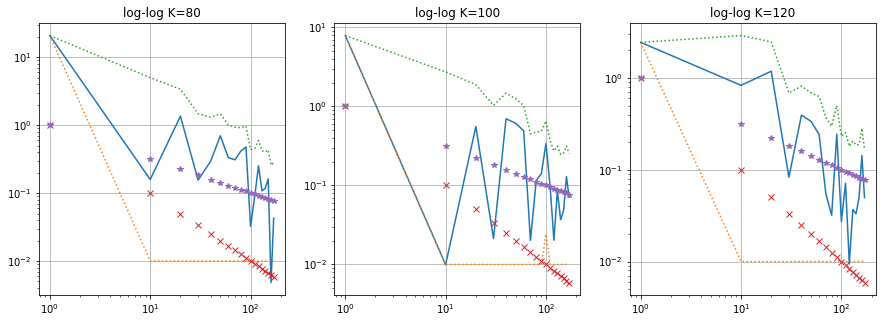

Convergence rate for strike price K=80:  0.4148
Convergence rate for strike price K=100: 0.5776
Convergence rate for strike price K=120: 0.5100


In [8]:
#-----------------------------------------------
# Input:
Nf   = 170
step = 10
plt.figure(figsize=(15, 5))

#-----------------------------------------------
plt.subplot(131)

# Assign the name error_i in the 2nd return value of the error function, 
# for each i in {80,100,120}. Similarly assign the name discr to the 1st
# return value of the error fuction and the name CI_i to the 3rd return value.
discr, error_80, CI_80 = error(80, Nf, step)

# Unpacking array of C.I. pairs:
CI_80_low, CI_80_high = zip(*CI_80)

plt.plot(discr, error_80)
plt.plot(discr, CI_80_low, ':')
plt.plot(discr, CI_80_high, ':')
plt.plot(discr, 1./discr, 'x')                            #reference line
plt.plot(discr, 1./discr**(0.5), '*')                     #reference line
plt.title('Strike Price K=80')
plt.grid(True)

#-----------------------------------------------
plt.subplot(132)

_, error_100, CI_100 = error(100, Nf, step)

# Unpacking array of C.I. pairs:
CI_100_low, CI_100_high = zip(*CI_100)

plt.plot(discr, error_100)
plt.plot(discr, CI_100_low, ':')
plt.plot(discr, CI_100_high, ':')
plt.plot(discr, 1./discr, 'x')                            #reference line
plt.plot(discr, 1./discr**(0.5), '*')                     #reference line
plt.title('Strike Price K=100')
plt.grid(True)

#-----------------------------------------------
plt.subplot(133)

_, error_120, CI_120 = error(120, Nf, step)

# Unpacking array of C.I. pairs:
CI_120_low, CI_120_high = zip(*CI_120)

plt.plot(discr, error_120)
plt.plot(discr, CI_120_low, ':')
plt.plot(discr, CI_120_high, ':')
plt.plot(discr, 1./discr, 'x')                            #reference line
plt.plot(discr, 1./discr**(0.5), '*')                     #reference line
plt.title('Strike Price K=120')
plt.grid(True)

plt.show()

#-----------------------------------------------
#-----------------------------------------------
plt.figure(figsize=(15, 5))


plt.subplot(131)

plt.loglog(discr, error_80)
plt.loglog(discr, CI_80_low, ':')
plt.loglog(discr, CI_80_high, ':')
plt.loglog(discr, 1./discr, 'x')                          #reference line
plt.loglog(discr, 1./discr**(0.5), '*')                   #reference line
plt.title('log-log K=80')
plt.grid(True)
#-----------------------------------------------
plt.subplot(132)

plt.loglog(discr, error_100)
plt.loglog(discr, CI_100_low, ':')
plt.loglog(discr, CI_100_high, ':')
plt.loglog(discr, 1./discr, 'x')                          #reference line
plt.loglog(discr, 1./discr**(0.5), '*')                   #reference line
plt.title('log-log K=100')
plt.grid(True)
#-----------------------------------------------
plt.subplot(133)

plt.loglog(discr, error_120)
plt.loglog(discr, CI_120_low, ':')
plt.loglog(discr, CI_120_high, ':')
plt.loglog(discr, 1./discr, 'x')                          #reference line
plt.loglog(discr, 1./discr**(0.5), '*')                   #reference line
plt.title('log-log K=120')
plt.grid(True)

plt.show()

#-----------------------------------------------
#-----------------------------------------------

# Convergence rates denoted as a_i with i in {80,100,120}.
# Here array[1:] omits the 1st element of the array, due 
# to division with 0 occuring and the rate blows up.
a_80_array  = -np.log(error_80[1:]) *1./np.log(discr[1:])
a_80        =  np.mean(a_80_array)

a_100_array = -np.log(error_100[1:]) *1./np.log(discr[1:])
a_100       =  np.mean(a_100_array)

a_120_array = -np.log(error_120[1:]) *1./np.log(discr[1:])
a_120       =  np.mean(a_120_array)

# Printing...
print("Convergence rate for strike price K=80:  %.4f" % a_80 )
print("Convergence rate for strike price K=100: %.4f" % a_100)
print("Convergence rate for strike price K=120: %.4f" % a_120)

## Approximating the Distribution of the Underlyings
The <b>Heston Stochastic Volatility Model</b> doesn't impy that the underlying assets follow a <b>log-normal distribution</b>: 
- Red Curve $\rightarrow$ Gamma Distribution
- Green Curve $\rightarrow$ Normal Distribuiton

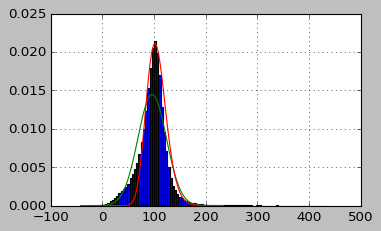

In [9]:
bins=100
style.use('classic')
#plt.hist(price_trajectories,bins)
fig = plt.figure(figsize=(5,3))
plt.hist(price_trajectories,bins,density=True)

mu = statistics.mean(price_trajectories)
sigma = statistics.stdev(price_trajectories)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.plot(x,stats.gamma.pdf(x, a=30, scale=3.5))

plt.grid(True)
plt.show()